# Time-Based Crime Analysis
This notebook focuses on analyzing crime patterns over time, which can help identify trends, detect seasonal variations, and pinpoint specific times when crimes are more likely to occur. 

In [67]:
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns            

## 1. Load Processed Data

In [68]:
# Save directory for images
save_path = '../visuals/time_analysis/'

# Load DataFrame from the Parquet file saved in the previous notebook
df = pd.read_parquet('../data/processed/df.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  int64         
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
 12  Year Occ      185715 non-null  int32         
 13  Month Occ     185715 non-null  int32         
 14  Weekday Occ   185715 non-null  object        
 15  Hour Occ      185

## 2. Analyzing Crime Patterns Over Time

### 2.1.  Crimes by Hour of the Day
We will now analyze how crimes are distributed throughout the day. Understanding the time of day when crimes occur can help identify peak hours for criminal activity.

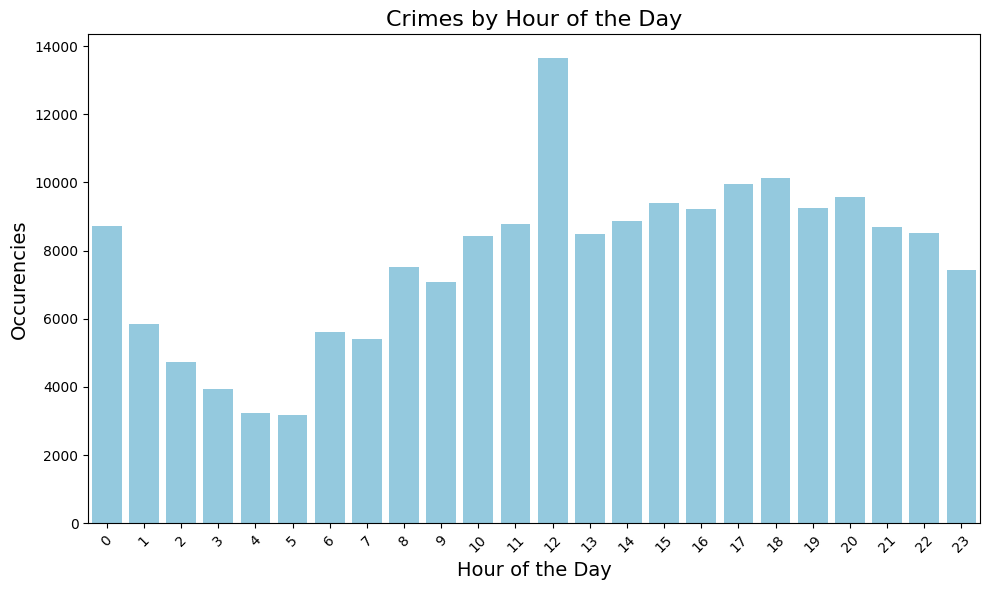

In [69]:
crime_by_hour = df['Hour Occ'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=crime_by_hour.index, y=crime_by_hour.values, color='skyblue')

plt.title('Crimes by Hour of the Day', fontdict={'fontsize': 16})
plt.xlabel('Hour of the Day', fontdict={'fontsize': 14})
plt.ylabel('Occurencies', fontdict={'fontsize': 14})
plt.xticks(range(24), rotation=45)
plt.tight_layout()

plt.savefig(save_path + 'crime_by_hour.png')

plt.show()

### 2.2 Crimes per Day of the Week
Next, we explore how crimes vary across different days of the week. This analysis can help identify which days have higher or lower crime rates.

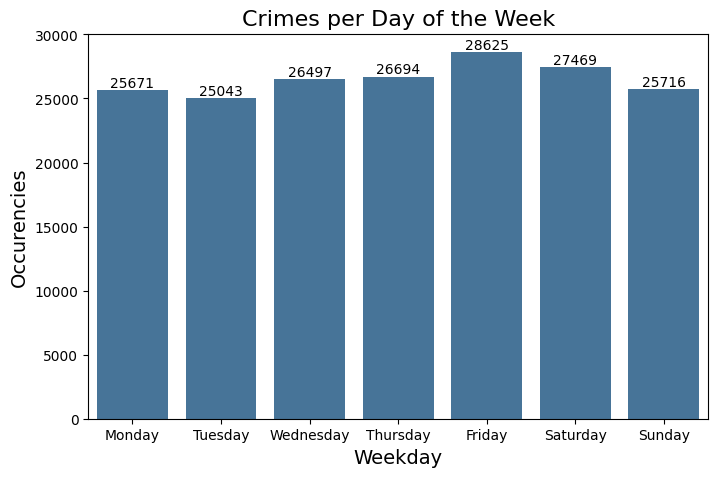

In [70]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Weekday Occ', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='#3975a6')

plt.title("Crimes per Day of the Week", fontdict={'fontsize': 16})
plt.ylabel('Occurencies', fontdict={'fontsize': 14})
plt.xlabel('Weekday', fontdict={'fontsize': 14})

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.savefig(save_path + "crimes_by_weekday.png")
plt.show()

### 2.3 Monthly Crime Trends
Now, we will analyze the trend of crimes over time by plotting the monthly count of crimes. This will help identify any seasonal trends and fluctuations in criminal activity.

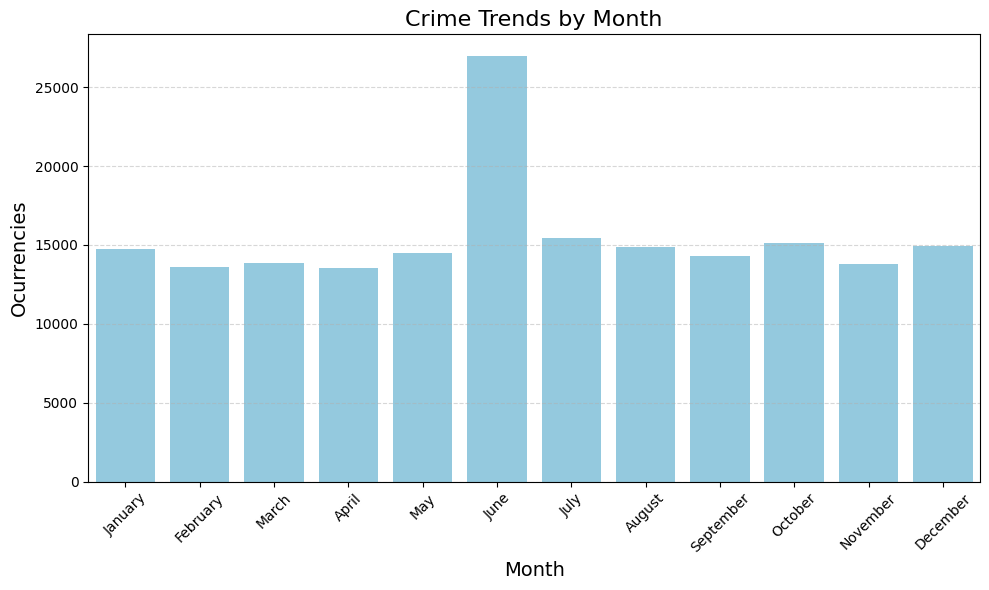

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

month_order = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_trend = df['Month Occ'].value_counts().reindex(range(1, 13)).rename(index=month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, color="skyblue")

plt.title('Crime Trends by Month', fontdict={'fontsize': 16})
plt.xlabel('Month', fontdict={'fontsize': 14})
plt.ylabel('Ocurrencies', fontdict={'fontsize': 14})
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig(save_path + 'crime_by_month.png')

plt.show()


### 2.4 Crime by Time of Day and Day of the Week
We can combine the analysis of crimes by hour of the day and day of the week to identify the most dangerous times during the week.

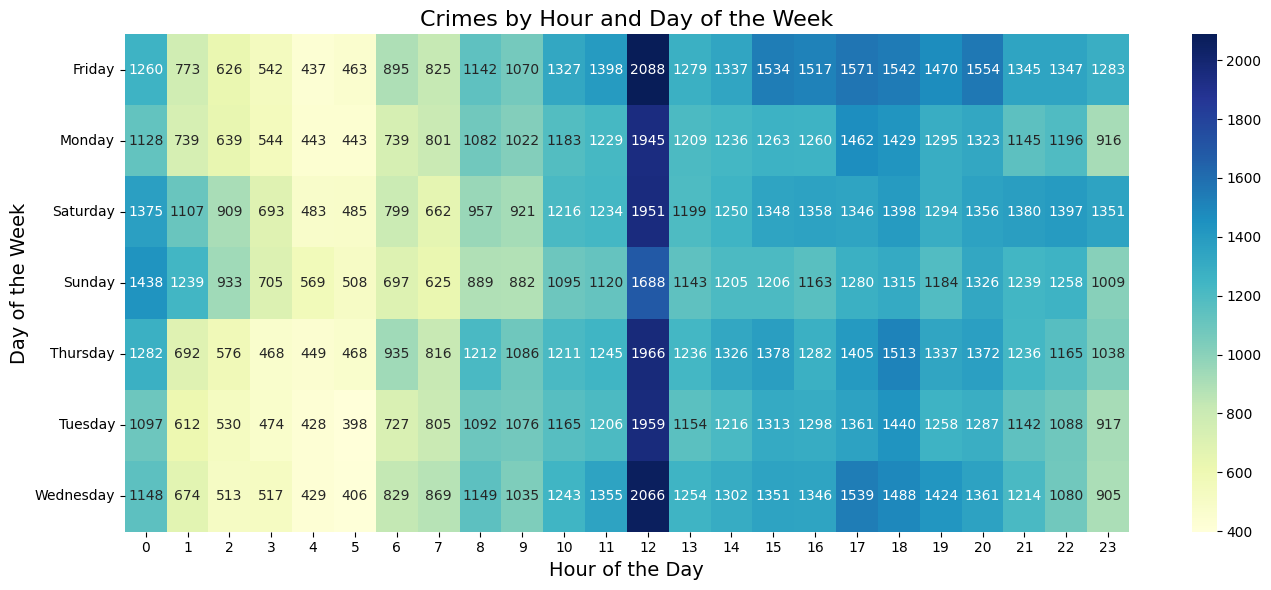

In [72]:
crime_by_time = df.groupby(['Weekday Occ', 'Hour Occ']).size().unstack(fill_value=0)
p
plt.figure(figsize=(14, 6))
sns.heatmap(crime_by_time, cmap="YlGnBu", annot=True, fmt="d")

plt.title('Crimes by Hour and Day of the Week', fontdict={'fontsize': 16})
plt.xlabel('Hour of the Day', fontdict={'fontsize': 14})
plt.ylabel('Day of the Week', fontdict={'fontsize': 14})
plt.tight_layout()

plt.savefig(save_path + 'crime_by_time_and_weekday.png')

plt.show()